## Projeto de Machine Learning - Predição de Doenças Cardíacas
alunos:


*   Ednaldo Batista de Melo
*   Samara Araújo Almeida
*   Adriel Gomes Rodrigues da Silva




---


 Este notebook implementa um projeto de machine learning utilizando um conjunto de dados sobre doenças cardíacas, seguindo os passos:
 1. Carregar e explorar o conjunto de dados
 2. Tratamento de dados ausentes
 3. Análise exploratória dos dados (EDA)
 4. Detecção e tratamento de outliers
 5. Divisão dos dados em conjuntos de treinamento e teste
 6. Implementação de múltiplos algoritmos de classificação
 7. Comparação de performance dos modelos
 8. Otimização de hiperparâmetros
 9. Comparação dos modelos otimizados
 10. Análise e discussão dos resultados

### 1. Carregando o conjunto de dados
 Começamos importando as bibliotecas necessárias e carregando o conjunto de dados.

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações para visualização
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Carregar o conjunto de dados
# Conforme o dicionário de dados, temos 14 colunas
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Carregando os dados
df = pd.read_csv('../data/data.csv', header=None, names=colunas, na_values='?')

# Visualizando as primeiras linhas do dataframe
print(df.head())

# Verificando informações gerais do dataframe
print(df.info())

# Estatísticas descritivas dos dados
print(df.describe().T)

ModuleNotFoundError: No module named 'seaborn'

### 2. Verificação e Tratamento de Dados Ausentes

In [ ]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificando a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes:")
print((df.isnull().sum() / len(df)) * 100)

# Verificar se existem valores que podem representar dados ausentes (como -1, 999, etc.)
for coluna in df.columns:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].value_counts().sort_index())

# Tratamento de dados ausentes (se encontrados)
# Para dados numéricos, podemos usar a mediana
# Para dados categóricos, podemos usar a moda

# Separar colunas numéricas e categóricas
colunas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
colunas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Aplicar imputação se necessário
if df.isnull().sum().sum() > 0:
    # Para variáveis numéricas
    for col in colunas_numericas:
        if df[col].isnull().sum() > 0:
            mediana = df[col].median()
            df[col].fillna(mediana, inplace=True)
            print(f"Preenchendo valores ausentes em {col} com a mediana: {mediana}")

    # Para variáveis categóricas
    for col in colunas_categoricas:
        if df[col].isnull().sum() > 0:
            moda = df[col].mode()[0]
            df[col].fillna(moda, inplace=True)
            print(f"Preenchendo valores ausentes em {col} com a moda: {moda}")
else:
    print("Não foram encontrados valores ausentes no conjunto de dados.")


Valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Porcentagem de valores ausentes:
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
target      0.000000
dtype: float64

Valores únicos em age:
age
29.0     1
34.0     2
35.0     4
37.0     2
38.0     2
39.0     4
40.0     3
41.0    10
42.0     8
43.0     8
44.0    11
45.0     8
46.0     7
47.0     5
48.0     7
49.0     5
50.0     7
51.0    12
52.0    13
53.0     8
54.0    16
55.0     8
56.0    11
57.0    17
58.0    19
59.0    14
60.0    12
61.0     8
62.0    11
63.0     9
64.0    10
65.0     8
66.0     7
67.0     9
68.0     4
69.0  

### 3. Análise Exploratória dos Dados (EDA)

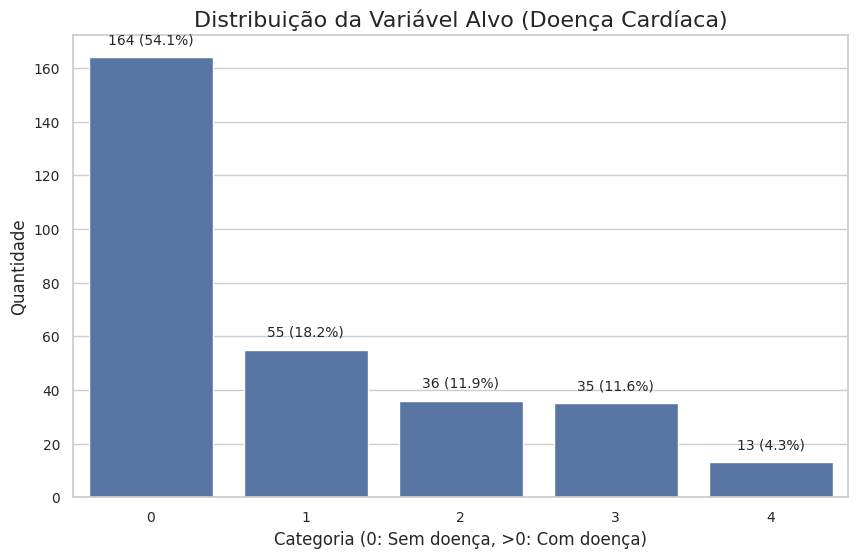

Distribuição da variável alvo binária:
target_binaria
0    164
1    139
Name: count, dtype: int64


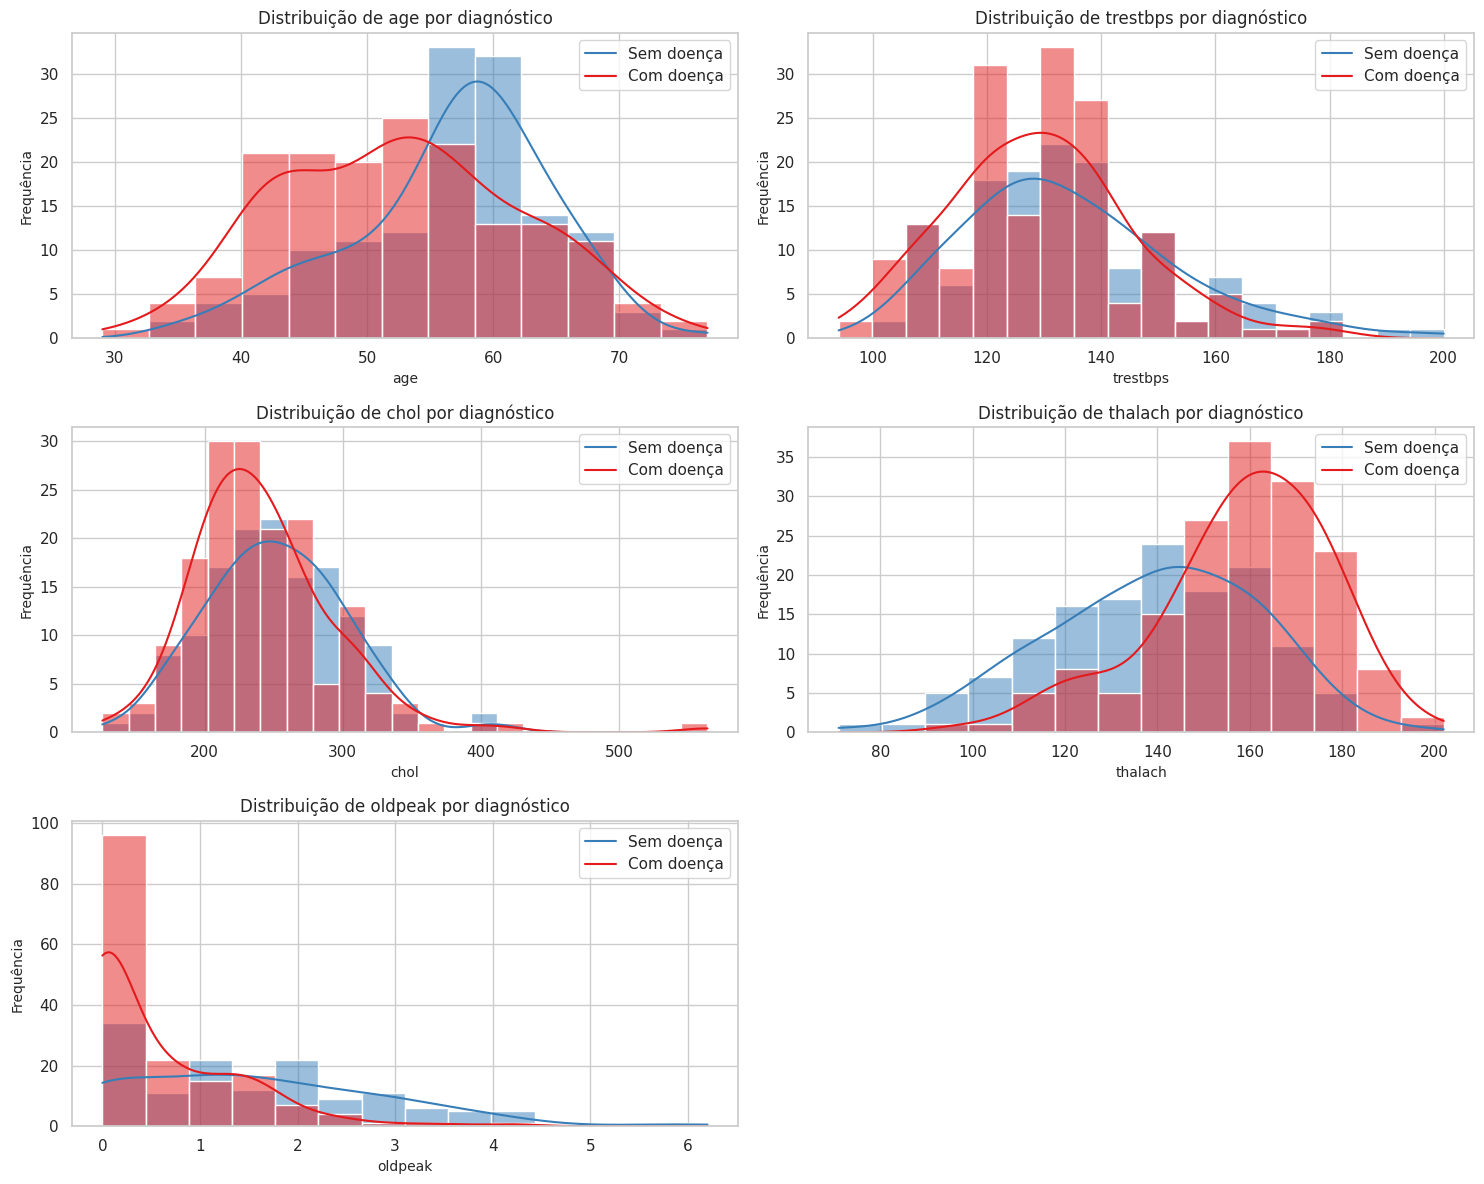

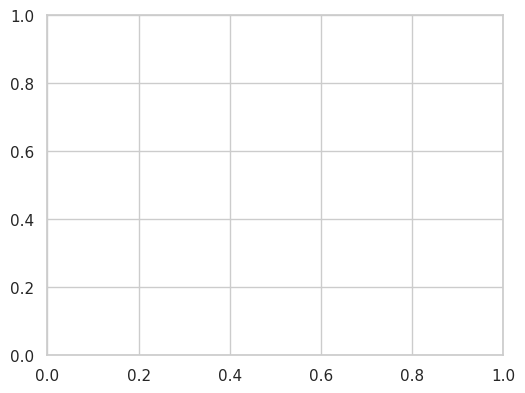

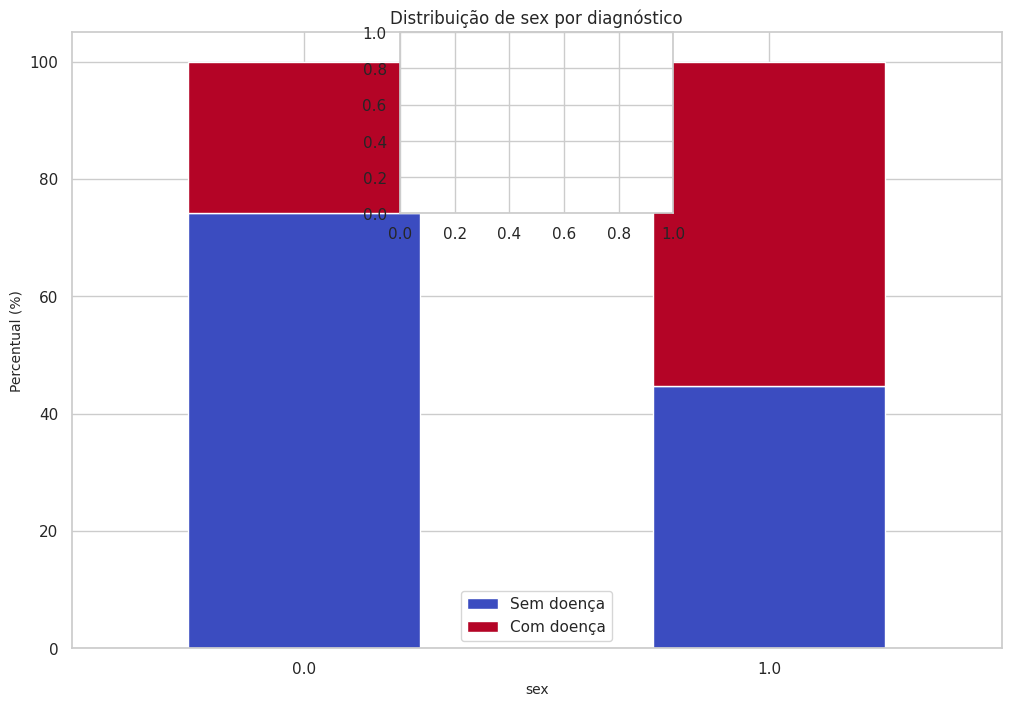

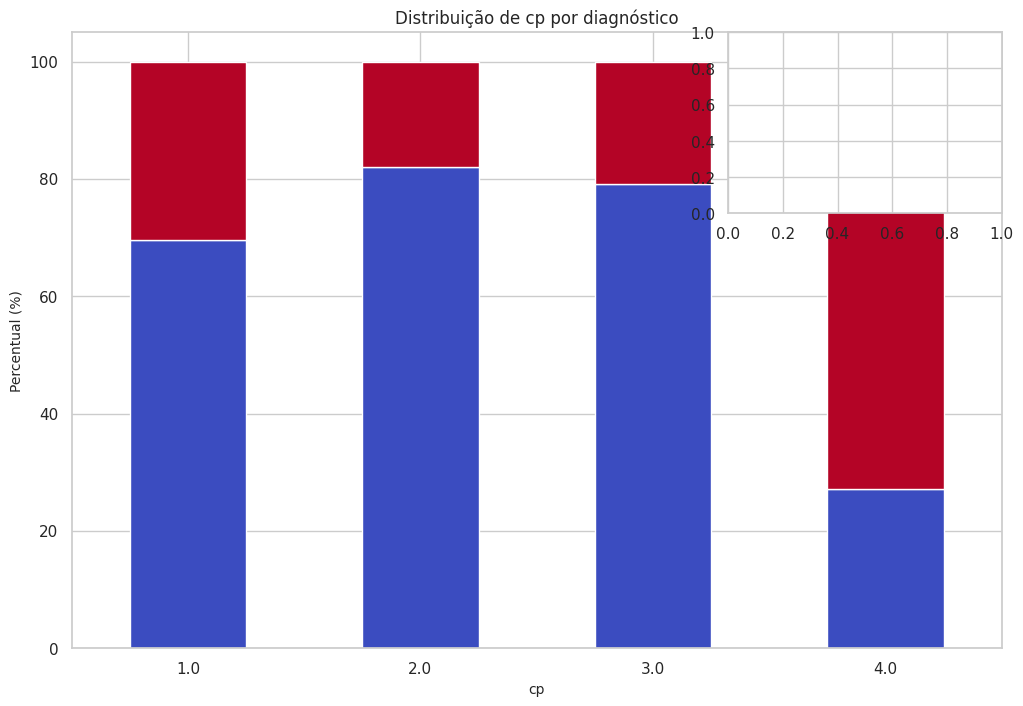

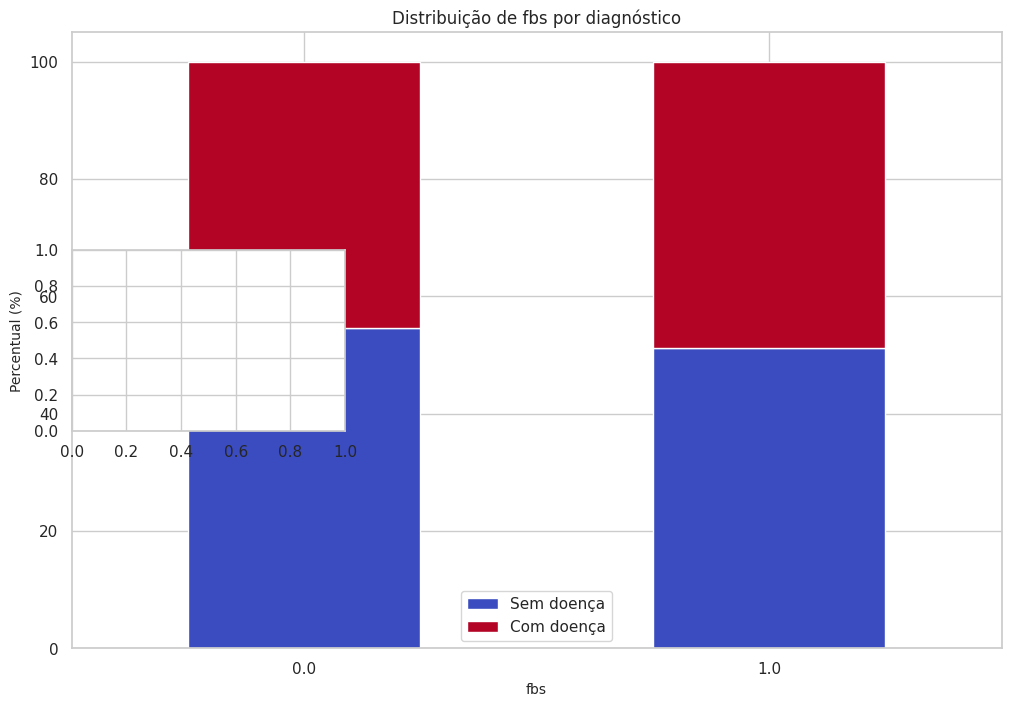

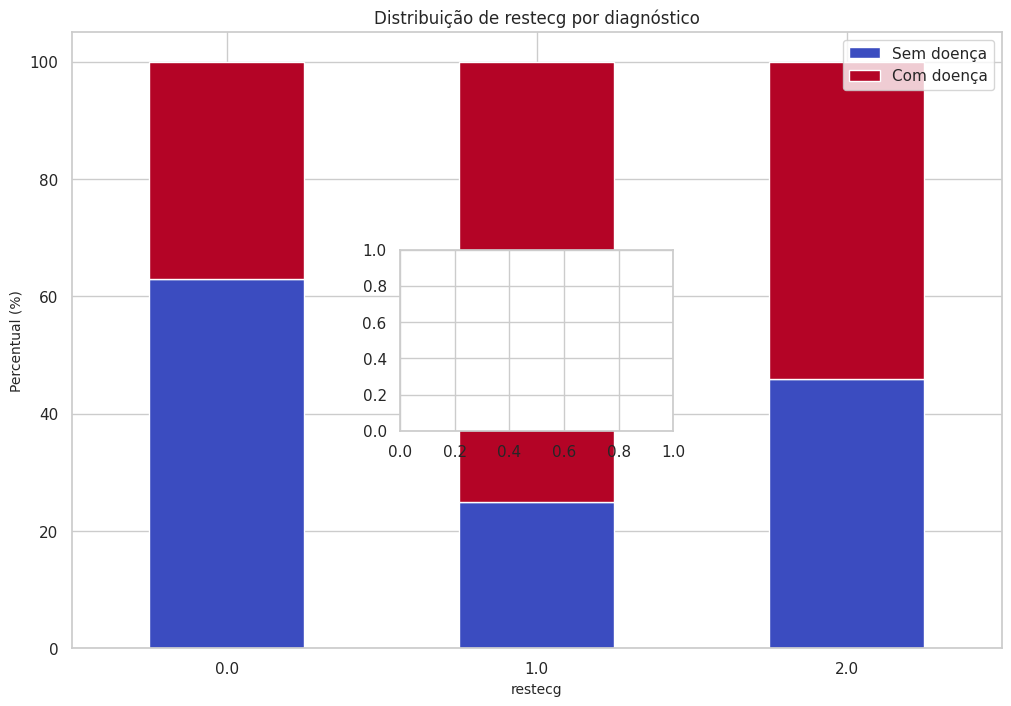

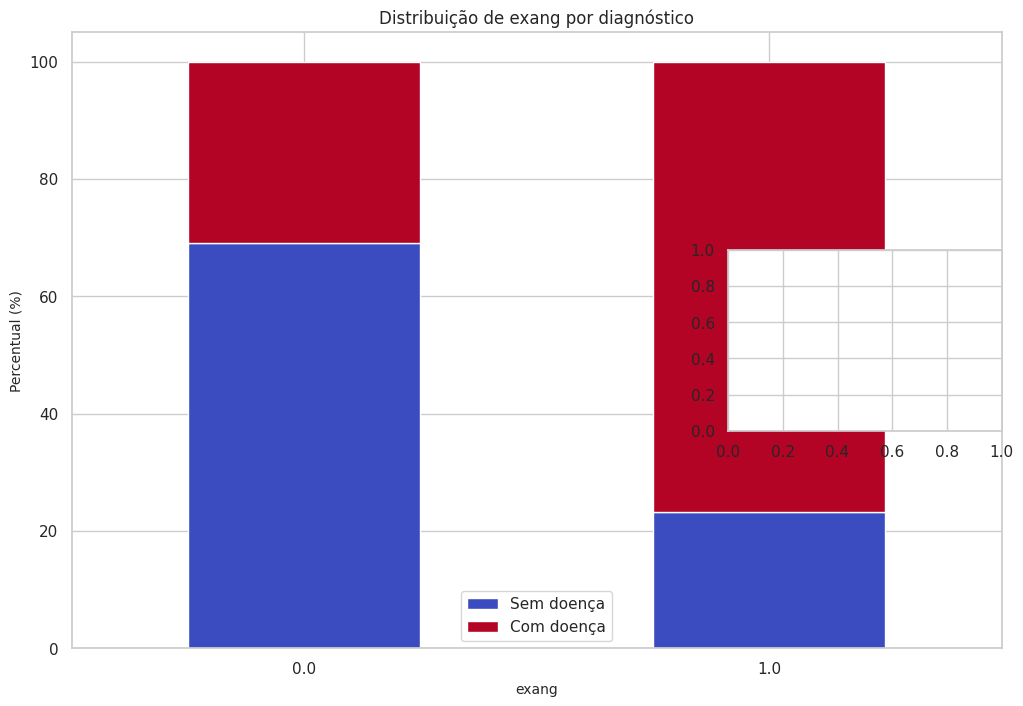

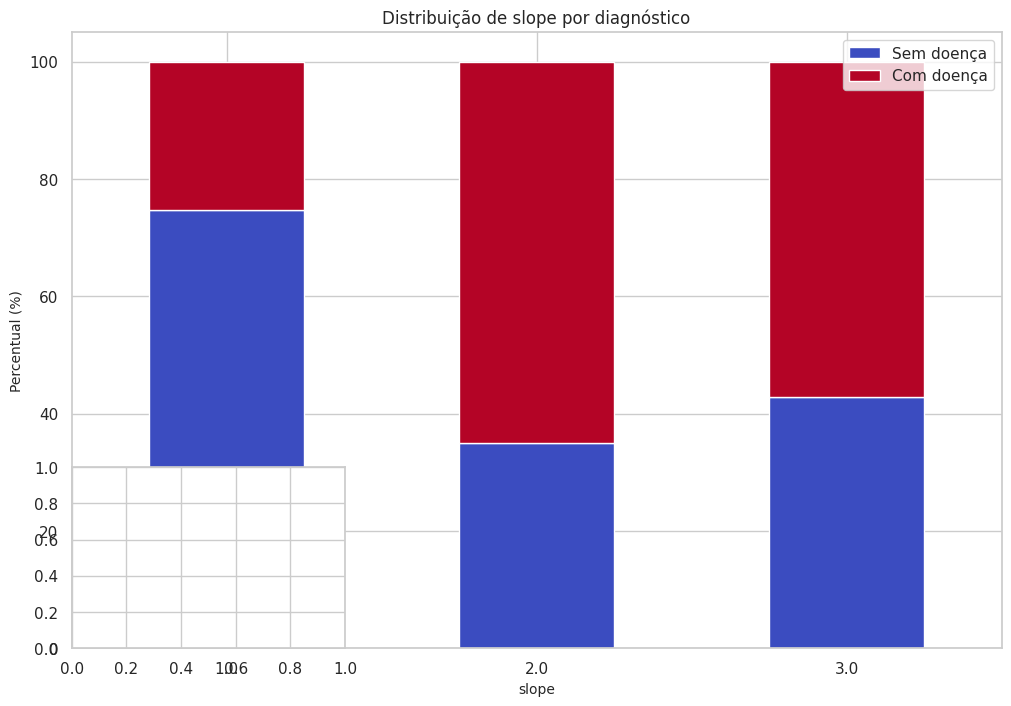

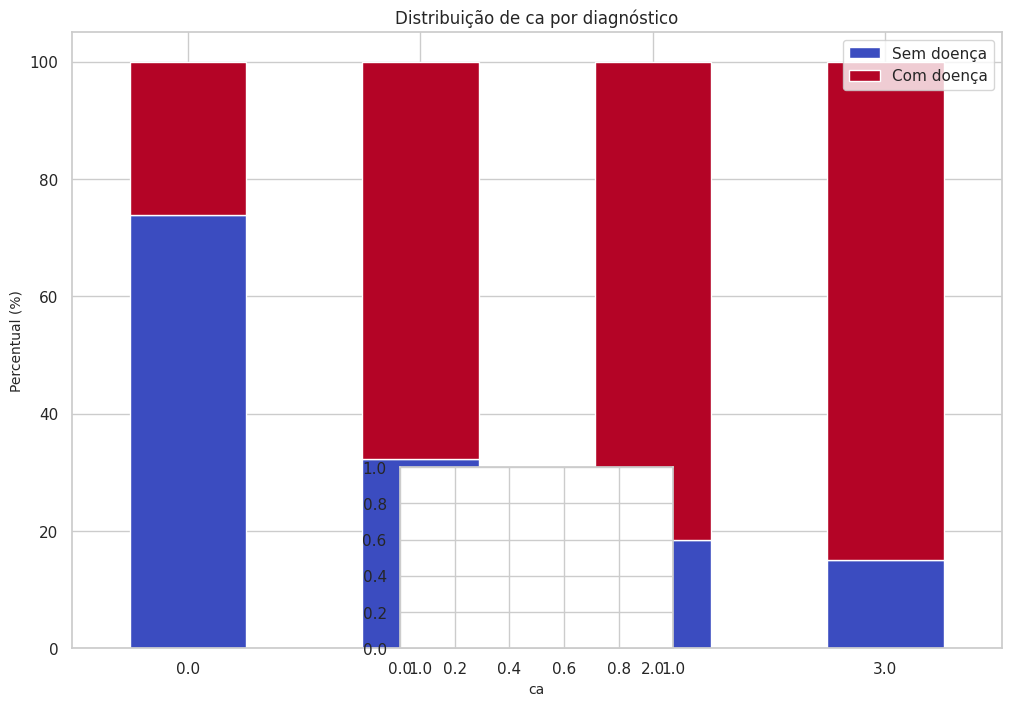

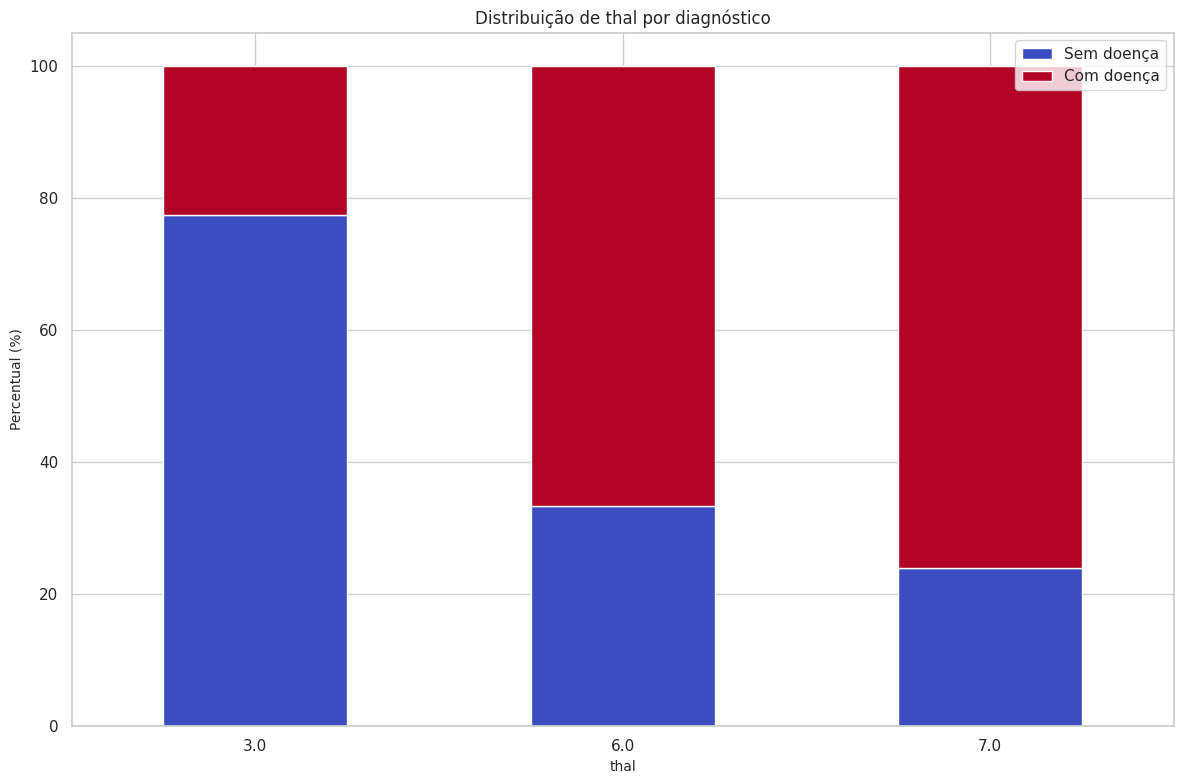

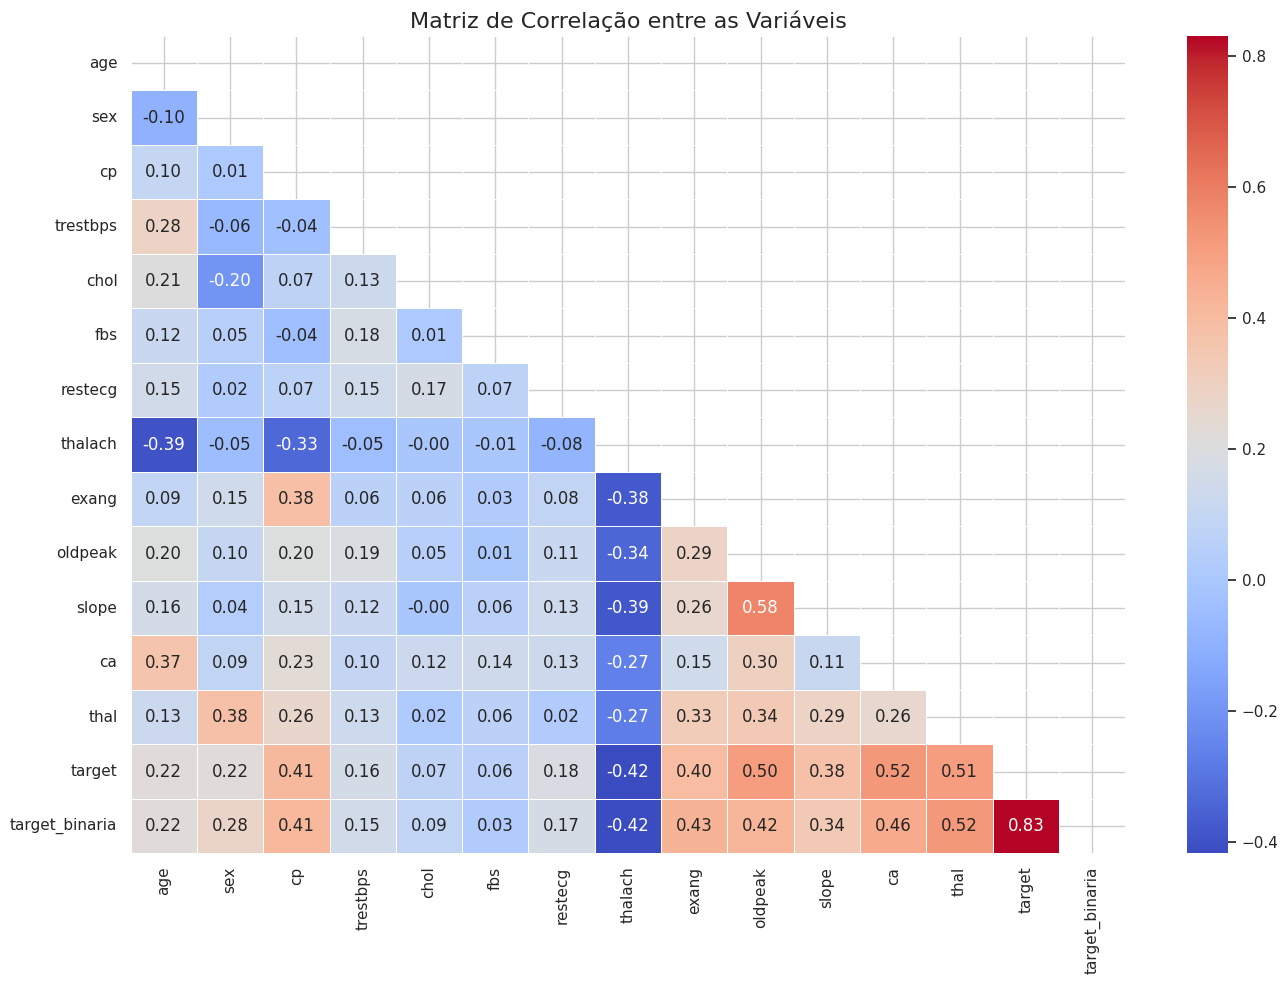

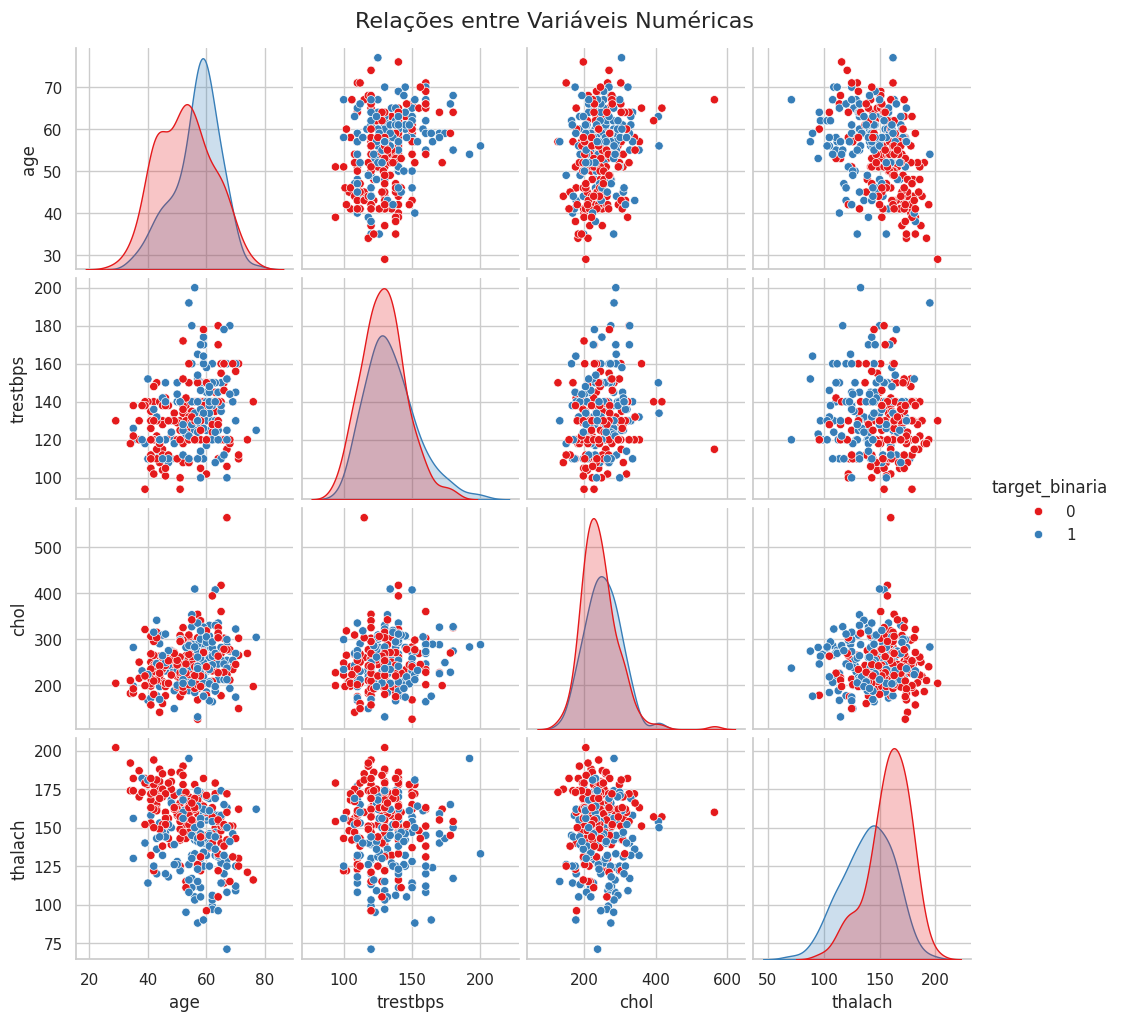

In [ ]:
# Distribuição da variável alvo
plt.figure(figsize=(10, 6))
target_counts = df['target'].value_counts().sort_index()
ax = sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribuição da Variável Alvo (Doença Cardíaca)', fontsize=16)
plt.xlabel('Categoria (0: Sem doença, >0: Com doença)', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionar anotações de quantidade/porcentagem
total = len(df)
for i, v in enumerate(target_counts.values):
    porcentagem = v / total * 100
    ax.text(i, v + 5, f"{v} ({porcentagem:.1f}%)", ha='center', fontsize=10)

plt.show()

# Criando uma versão binária da variável alvo para facilitar algumas análises
df['target_binaria'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print(f"Distribuição da variável alvo binária:\n{df['target_binaria'].value_counts()}")

# Análise de variáveis numéricas
plt.figure(figsize=(15, 12))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=coluna, hue='target_binaria', kde=True, palette='Set1')
    plt.title(f'Distribuição de {coluna} por diagnóstico', fontsize=12)
    plt.xlabel(coluna, fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    plt.legend(['Sem doença', 'Com doença'])

plt.tight_layout()
plt.show()

# Análise de variáveis categóricas
plt.figure(figsize=(20, 15))

for i, coluna in enumerate(colunas_categoricas[:-1], 1):  # Excluindo a variável alvo
    plt.subplot(3, 3, i)
    crosstab = pd.crosstab(df[coluna], df['target_binaria'])
    crosstab_pct = crosstab.div(crosstab.sum(1), axis=0) * 100

    crosstab_pct.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title(f'Distribuição de {coluna} por diagnóstico', fontsize=12)
    plt.xlabel(coluna, fontsize=10)
    plt.ylabel('Percentual (%)', fontsize=10)
    plt.legend(['Sem doença', 'Com doença'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Análise de correlação entre as variáveis
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

# Relações entre pares de variáveis importantes
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target_binaria']],
             hue='target_binaria', palette='Set1')
plt.suptitle('Relações entre Variáveis Numéricas', y=1.02, fontsize=16)
plt.show()


### 4. Detecção e Tratamento de Outliers

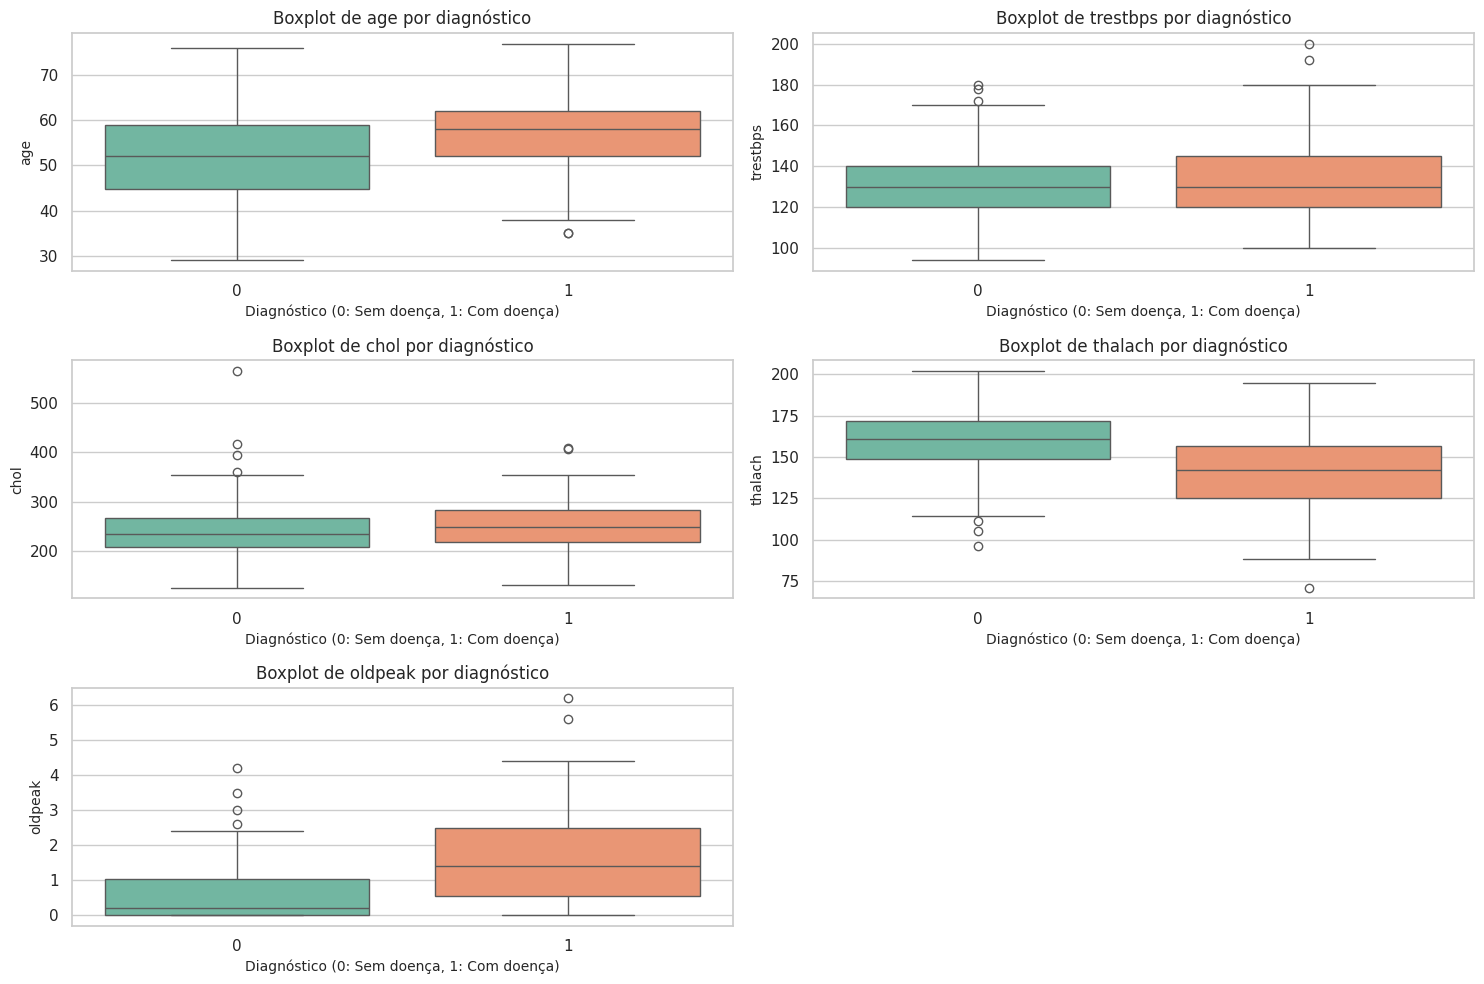


Outliers em age:
Limite inferior: 28.50
Limite superior: 80.50
Número de outliers: 0 (0.00% do total)

Outliers em trestbps:
Limite inferior: 90.00
Limite superior: 170.00
Número de outliers: 9 (2.97% do total)
Primeiros 5 outliers:
     trestbps  target_binaria
14      172.0               0
83      180.0               1
126     200.0               1
172     174.0               1
183     178.0               0

Outliers em chol:
Limite inferior: 115.00
Limite superior: 371.00
Número de outliers: 5 (1.65% do total)
Primeiros 5 outliers:
      chol  target_binaria
48   417.0               0
121  407.0               1
152  564.0               0
173  394.0               0
181  409.0               1

Outliers em thalach:
Limite inferior: 84.75
Limite superior: 214.75
Número de outliers: 1 (0.33% do total)
Primeiros 5 outliers:
     thalach  target_binaria
245     71.0               1

Outliers em oldpeak:
Limite inferior: -2.40
Limite superior: 4.00
Número de outliers: 5 (1.65% do total)
Pr

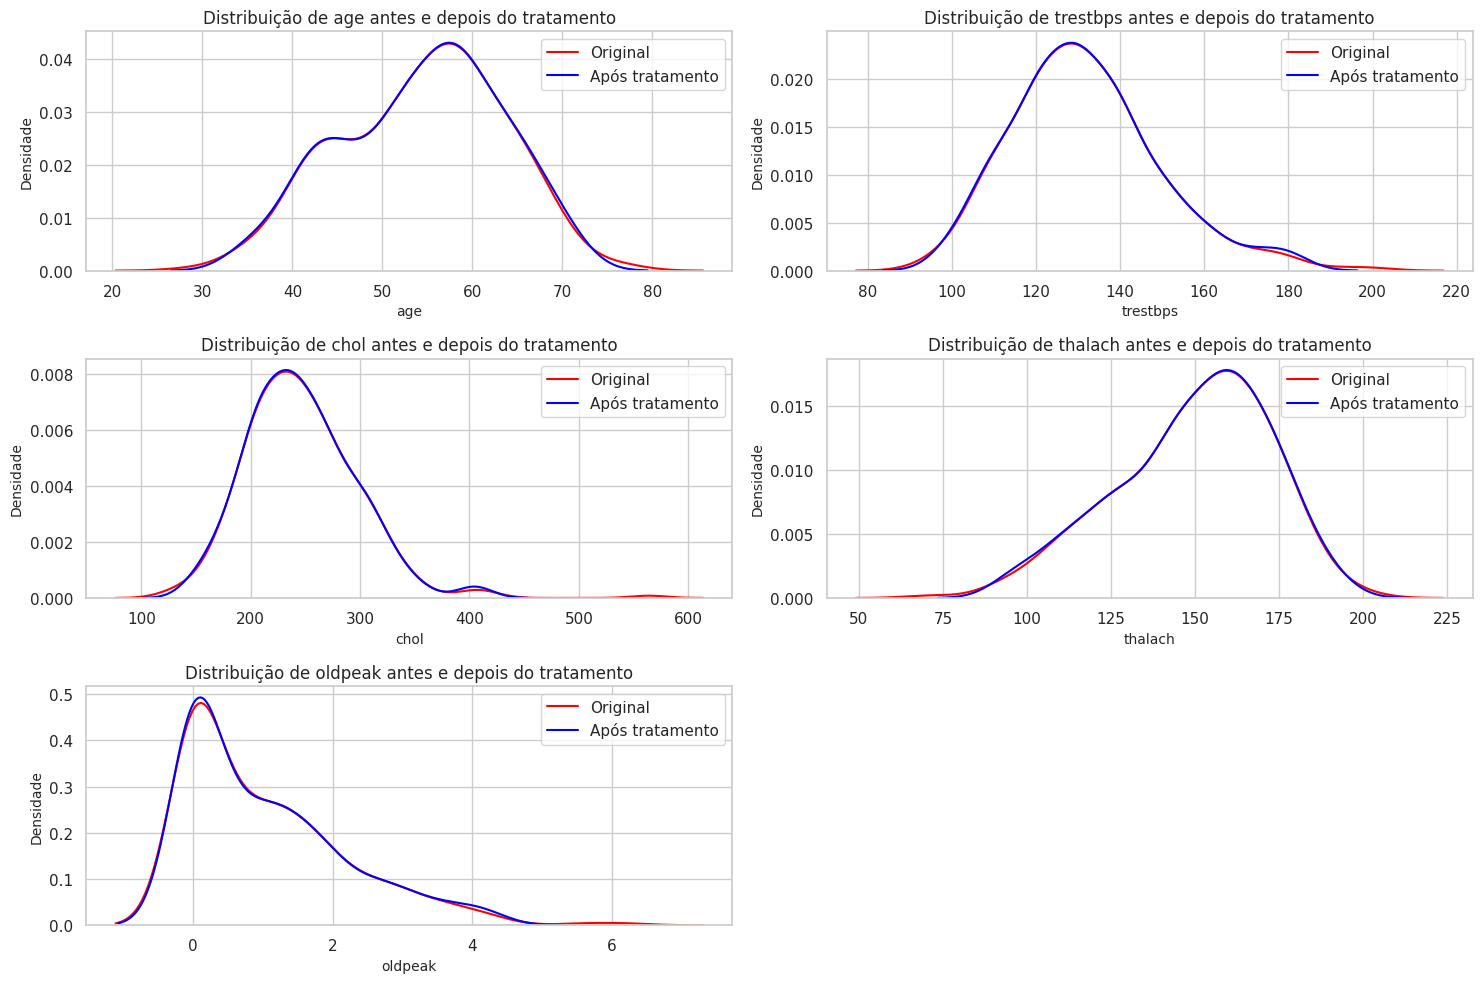

In [ ]:
# Visualizando a distribuição de outliers com boxplots
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target_binaria', y=coluna, data=df, palette='Set2')
    plt.title(f'Boxplot de {coluna} por diagnóstico', fontsize=12)
    plt.xlabel('Diagnóstico (0: Sem doença, 1: Com doença)', fontsize=10)
    plt.ylabel(coluna, fontsize=10)

plt.tight_layout()
plt.show()

# Identificando outliers usando o método IQR (Intervalo Interquartil)
def identificar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    return outliers, limite_inferior, limite_superior, len(outliers)

# Verificando outliers em cada variável numérica
for coluna in colunas_numericas:
    outliers, limite_inferior, limite_superior, n_outliers = identificar_outliers_iqr(df, coluna)

    print(f"\nOutliers em {coluna}:")
    print(f"Limite inferior: {limite_inferior:.2f}")
    print(f"Limite superior: {limite_superior:.2f}")
    print(f"Número de outliers: {n_outliers} ({(n_outliers/len(df))*100:.2f}% do total)")

    if n_outliers > 0:
        print("Primeiros 5 outliers:")
        print(outliers[[coluna, 'target_binaria']].head())

# Identificando outliers usando o Z-score
def identificar_outliers_zscore(df, coluna, limite=3):
    z_scores = np.abs(stats.zscore(df[coluna]))
    outliers = df[z_scores > limite]
    return outliers, len(outliers)

# Verificando outliers usando o Z-score
for coluna in colunas_numericas:
    outliers, n_outliers = identificar_outliers_zscore(df, coluna)

    print(f"\nOutliers em {coluna} (Z-score > 3):")
    print(f"Número de outliers: {n_outliers} ({(n_outliers/len(df))*100:.2f}% do total)")

    if n_outliers > 0:
        print("Primeiros 5 outliers:")
        print(outliers[[coluna, 'target_binaria']].head())

# Decisão sobre o tratamento de outliers
# Vamos criar uma cópia do dataframe para manter os dados originais
df_sem_outliers = df.copy()

# Para cada coluna numérica, vamos tratar outliers usando capping (limitando aos percentis 1% e 99%)
for coluna in colunas_numericas:
    # Obtendo os percentis 1% e 99%
    p01 = df[coluna].quantile(0.01)
    p99 = df[coluna].quantile(0.99)

    # Aplicando capping
    df_sem_outliers[coluna] = df_sem_outliers[coluna].clip(lower=p01, upper=p99)

    # Verificando quantos valores foram modificados
    n_modificados = len(df[df[coluna] < p01]) + len(df[df[coluna] > p99])
    print(f"Coluna {coluna}: {n_modificados} valores foram limitados ({(n_modificados/len(df))*100:.2f}% do total)")

# Comparando distribuições antes e depois do tratamento de outliers
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 2, i)

    # Plotando distribuição original
    sns.kdeplot(df[coluna], color='red', label='Original')

    # Plotando distribuição após tratamento
    sns.kdeplot(df_sem_outliers[coluna], color='blue', label='Após tratamento')

    plt.title(f'Distribuição de {coluna} antes e depois do tratamento', fontsize=12)
    plt.xlabel(coluna, fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend()

plt.tight_layout()
plt.show()


### 5. Divisão dos Dados em Conjuntos de Treinamento e Teste

In [ ]:
# Importando as bibliotecas necessárias para divisão dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definindo features (X) e target (y)
# Vamos usar a variável target binária para simplificar o problema de classificação
X = df_sem_outliers.drop(['target', 'target_binaria'], axis=1)
y = df_sem_outliers['target_binaria']

# Divisão dos dados em conjuntos de treinamento e teste (estratificada pela variável alvo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificando as proporções
print(f"Proporção da classe positiva no conjunto completo: {y.mean():.2f}")
print(f"Proporção da classe positiva no conjunto de treino: {y_train.mean():.2f}")
print(f"Proporção da classe positiva no conjunto de teste: {y_test.mean():.2f}")

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para facilitar a interpretação
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


Proporção da classe positiva no conjunto completo: 0.46
Proporção da classe positiva no conjunto de treino: 0.46
Proporção da classe positiva no conjunto de teste: 0.46


### 6. Implementação de Algoritmos de Classificação

In [ ]:
# Importando os algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importando métricas de avaliação
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Função para avaliar o modelo
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test):
    # Treinando o modelo
    modelo.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = modelo.predict(X_test)

    # Probabilidades (para ROC AUC)
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:, 1]
    else:  # Para SVM que não tem predict_proba por padrão
        y_proba = modelo.decision_function(X_test)

    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Retornando os resultados
    return {
        'modelo': modelo,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

# Criando os modelos
modelos = {
    'Regressão Logística': LogisticRegression(random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier()
}

# Avaliando cada modelo
resultados = {}
for nome, modelo in modelos.items():
    print(f"Avaliando o modelo: {nome}")
    resultados[nome] = avaliar_modelo(modelo, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"Acurácia: {resultados[nome]['accuracy']:.4f}")
    print(f"ROC AUC: {resultados[nome]['roc_auc']:.4f}")
    print("\nMatriz de Confusão:")
    print(resultados[nome]['conf_matrix'])
    print("\nRelatório de Classificação:")
    print(resultados[nome]['class_report'])
    print("-" * 60)


Avaliando o modelo: Regressão Logística
Acurácia: 0.8352
ROC AUC: 0.9159

Matriz de Confusão:
[[42  7]
 [ 8 34]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.83      0.81      0.82        42

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

------------------------------------------------------------
Avaliando o modelo: Árvore de Decisão
Acurácia: 0.7143
ROC AUC: 0.7160

Matriz de Confusão:
[[34 15]
 [11 31]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        49
           1       0.67      0.74      0.70        42

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91

---

### 7. Comparação dos Modelos

                Modelo  Acurácia   ROC AUC
0        Random Forest  0.857143  0.929543
1  Regressão Logística  0.835165  0.915938
2                  SVM  0.824176  0.907920
3                  KNN  0.802198  0.869534
4    Árvore de Decisão  0.714286  0.715986


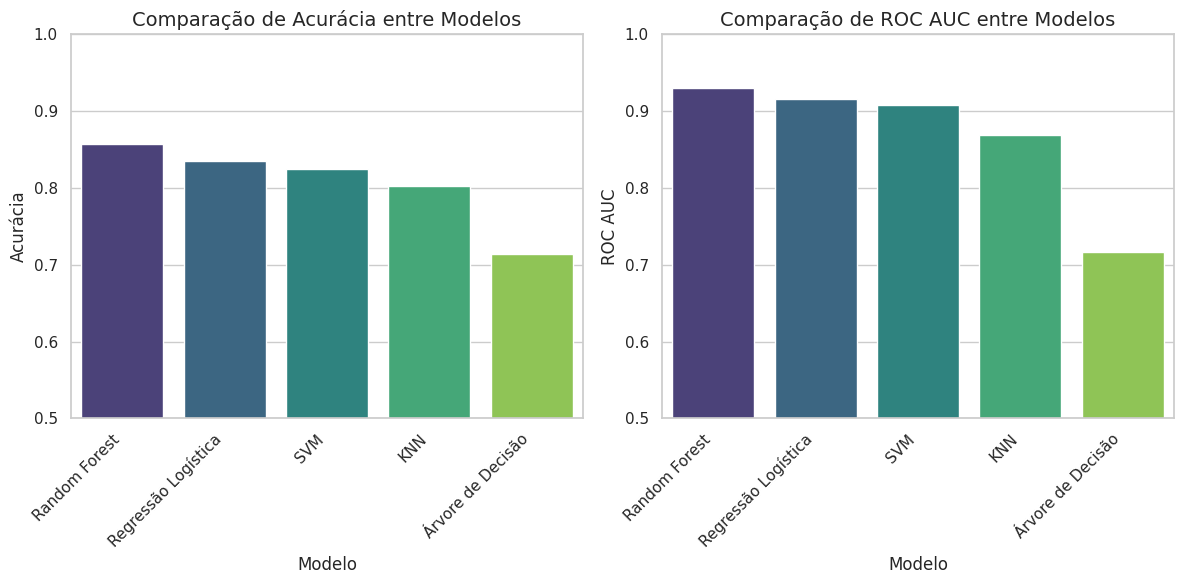

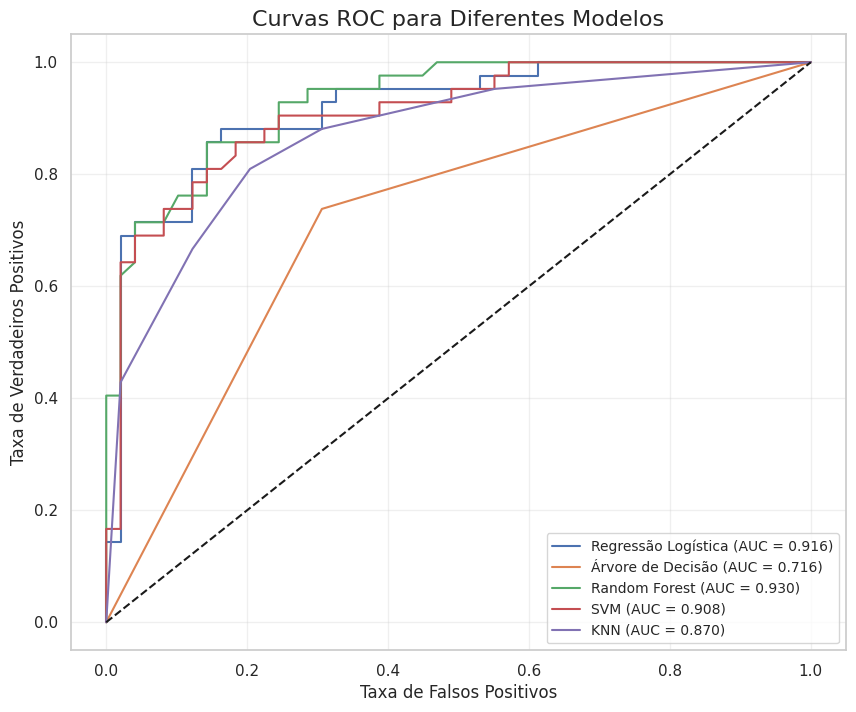

In [ ]:
# Criando um DataFrame para comparar as métricas dos modelos
metricas_df = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Acurácia': [resultados[nome]['accuracy'] for nome in resultados],
    'ROC AUC': [resultados[nome]['roc_auc'] for nome in resultados]
})

metricas_df = metricas_df.sort_values('Acurácia', ascending=False).reset_index(drop=True)
print(metricas_df)

# Visualizando as métricas
plt.figure(figsize=(12, 6))

# Plotando acurácia
plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='Acurácia', data=metricas_df, palette='viridis')
plt.title('Comparação de Acurácia entre Modelos', fontsize=14)
plt.ylim(0.5, 1.0)  # Ajustando o limite para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plotando ROC AUC
plt.subplot(1, 2, 2)
sns.barplot(x='Modelo', y='ROC AUC', data=metricas_df, palette='viridis')
plt.title('Comparação de ROC AUC entre Modelos', fontsize=14)
plt.ylim(0.5, 1.0)  # Ajustando o limite para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Plotando as curvas ROC para comparação
plt.figure(figsize=(10, 8))

for nome in resultados:
    fpr, tpr, _ = roc_curve(y_test, resultados[nome]['y_proba'])
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {resultados[nome]["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curvas ROC para Diferentes Modelos', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


### 8. Otimização de Hiperparâmetros

In [ ]:
# Importando as bibliotecas para otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

# Selecionando os três melhores modelos para otimização
top3_modelos = metricas_df.head(3)['Modelo'].tolist()
print(f"Top 3 modelos para otimização: {top3_modelos}")

# Definindo os espaços de busca para cada modelo
param_spaces = {}

# Parâmetros para Regressão Logística
if 'Regressão Logística' in top3_modelos:
    param_spaces['Regressão Logística'] = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300, 500]
    }

# Parâmetros para Árvore de Decisão
if 'Árvore de Decisão' in top3_modelos:
    param_spaces['Árvore de Decisão'] = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

# Parâmetros para Random Forest
if 'Random Forest' in top3_modelos:
    param_spaces['Random Forest'] = {
        'n_estimators': [50, 100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

# Parâmetros para SVM
if 'SVM' in top3_modelos:
    param_spaces['SVM'] = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
        'degree': [2, 3, 4, 5]  # Apenas para kernel='poly'
    }

# Parâmetros para KNN
if 'KNN' in top3_modelos:
    param_spaces['KNN'] = {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }

# Realizando a otimização de hiperparâmetros
modelos_otimizados = {}

for nome in top3_modelos:
    print(f"\nOtimizando o modelo: {nome}")

    # Utilizando RandomizedSearchCV por ser mais eficiente
    grid_search = RandomizedSearchCV(
        modelos[nome],
        param_distributions=param_spaces[nome],
        n_iter=20,  # Número de combinações a testar
        cv=5,       # Validação cruzada com 5 folds
        scoring='roc_auc',
        n_jobs=-1,  # Usar todos os cores disponíveis
        random_state=42,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"Melhores parâmetros para {nome}:")
    print(grid_search.best_params_)
    print(f"Melhor pontuação de validação cruzada: {grid_search.best_score_:.4f}")

    # Salvando o melhor modelo
    modelos_otimizados[nome] = grid_search.best_estimator_


Top 3 modelos para otimização: ['Random Forest', 'Regressão Logística', 'SVM']

Otimizando o modelo: Random Forest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros para Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'gini'}
Melhor pontuação de validação cruzada: 0.8956

Otimizando o modelo: Regressão Logística
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros para Regressão Logística:
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 200, 'C': 1}
Melhor pontuação de validação cruzada: 0.8929

Otimizando o modelo: SVM
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros para SVM:
{'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 5, 'C': 0.1}
Melhor pontuação de validação cruzada: 0.8941


### 9. Comparação dos Modelos Otimizados

Avaliando o modelo otimizado: Random Forest
Acurácia: 0.8571
ROC AUC: 0.9315

Matriz de Confusão:
[[43  6]
 [ 7 35]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.85      0.83      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

------------------------------------------------------------
Avaliando o modelo otimizado: Regressão Logística
Acurácia: 0.8352
ROC AUC: 0.9159

Matriz de Confusão:
[[42  7]
 [ 8 34]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.83      0.81      0.82        42

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.8

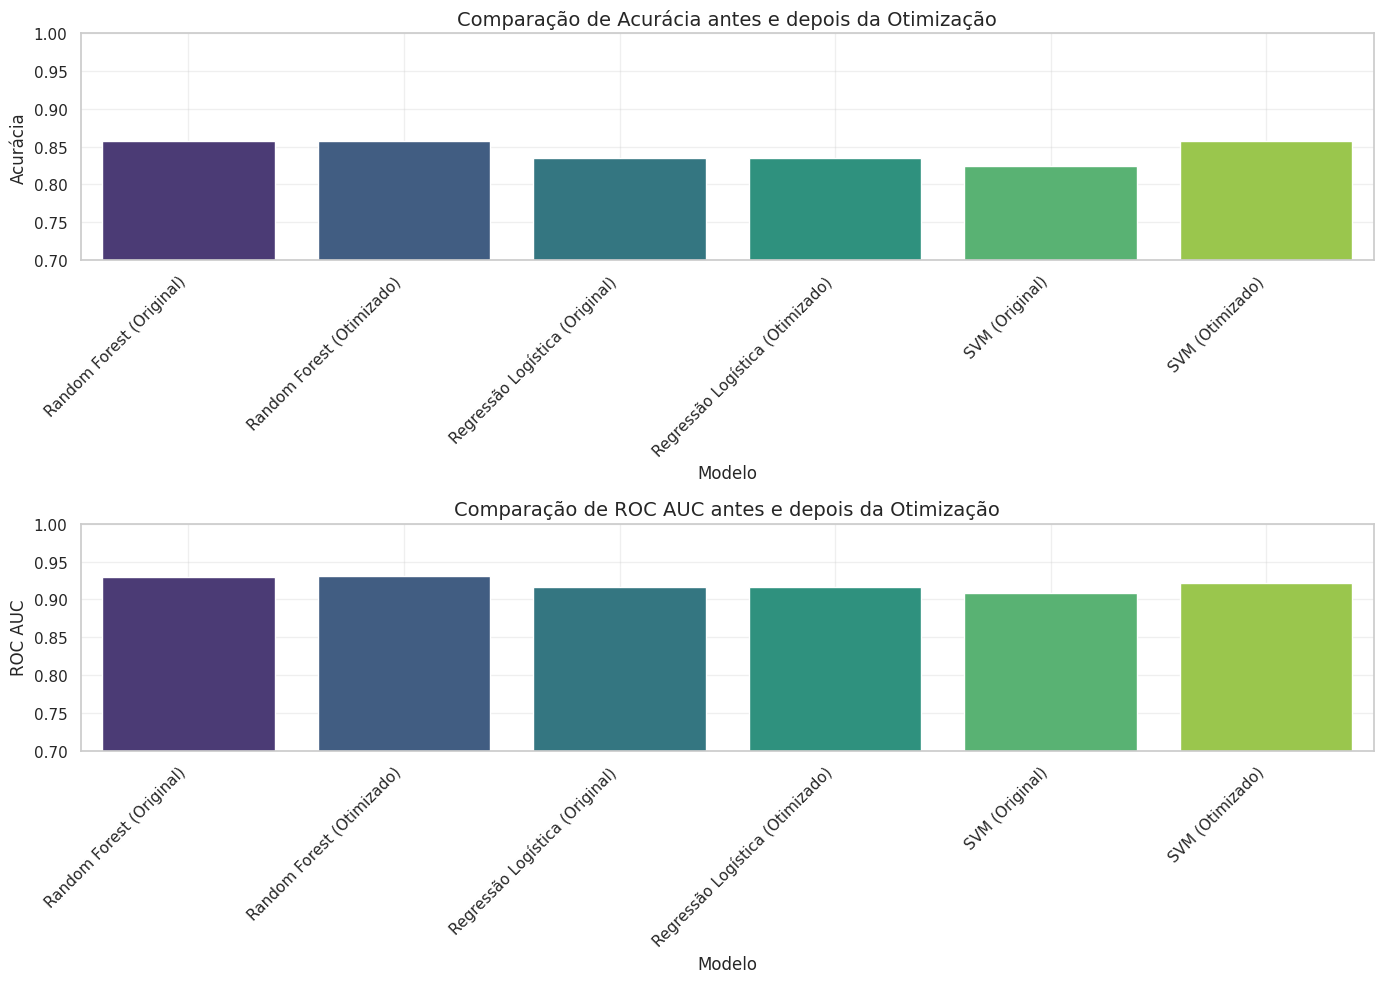

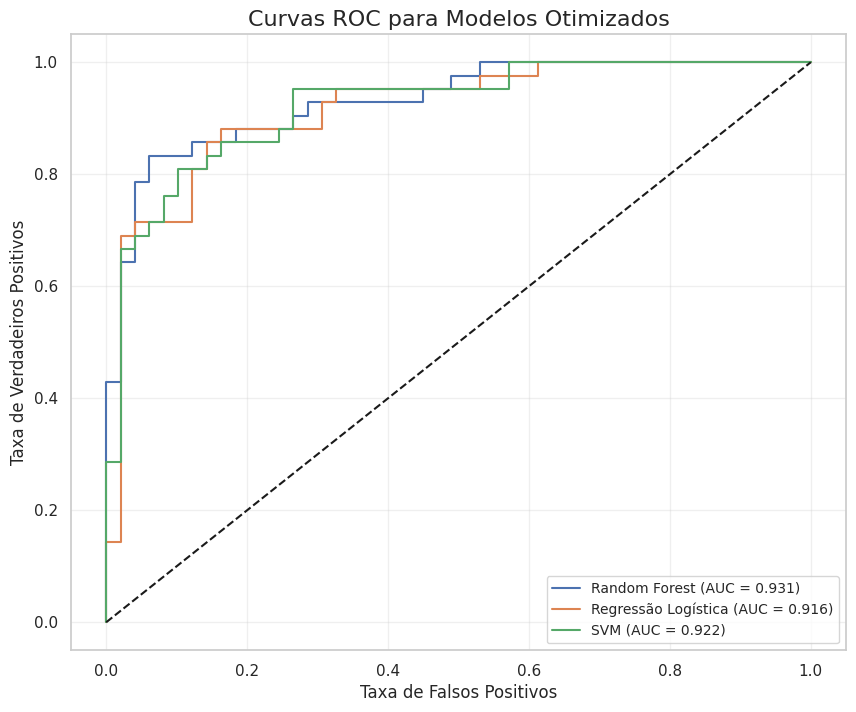

In [ ]:
# Avaliando os modelos otimizados
resultados_otimizados = {}
for nome, modelo in modelos_otimizados.items():
    print(f"Avaliando o modelo otimizado: {nome}")
    resultados_otimizados[nome] = avaliar_modelo(modelo, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"Acurácia: {resultados_otimizados[nome]['accuracy']:.4f}")
    print(f"ROC AUC: {resultados_otimizados[nome]['roc_auc']:.4f}")
    print("\nMatriz de Confusão:")
    print(resultados_otimizados[nome]['conf_matrix'])
    print("\nRelatório de Classificação:")
    print(resultados_otimizados[nome]['class_report'])
    print("-" * 60)

# Criando um DataFrame para comparar as métricas dos modelos otimizados
metricas_otimizados_df = pd.DataFrame({
    'Modelo': list(resultados_otimizados.keys()),
    'Acurácia': [resultados_otimizados[nome]['accuracy'] for nome in resultados_otimizados],
    'ROC AUC': [resultados_otimizados[nome]['roc_auc'] for nome in resultados_otimizados]
})

metricas_otimizados_df = metricas_otimizados_df.sort_values('Acurácia', ascending=False).reset_index(drop=True)
print(metricas_otimizados_df)

# Comparando os modelos antes e depois da otimização
comparacao_df = pd.DataFrame()

for nome in top3_modelos:
    antes = {
        'Modelo': f"{nome} (Original)",
        'Acurácia': resultados[nome]['accuracy'],
        'ROC AUC': resultados[nome]['roc_auc']
    }
    depois = {
        'Modelo': f"{nome} (Otimizado)",
        'Acurácia': resultados_otimizados[nome]['accuracy'],
        'ROC AUC': resultados_otimizados[nome]['roc_auc']
    }
    comparacao_df = pd.concat([comparacao_df, pd.DataFrame([antes, depois])], ignore_index=True)

print(comparacao_df)

# Visualizando a comparação
plt.figure(figsize=(14, 10))

# Plotando acurácia
plt.subplot(2, 1, 1)
sns.barplot(x='Modelo', y='Acurácia', data=comparacao_df, palette='viridis')
plt.title('Comparação de Acurácia antes e depois da Otimização', fontsize=14)
plt.ylim(0.7, 1.0)  # Ajustando o limite para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Plotando ROC AUC
plt.subplot(2, 1, 2)
sns.barplot(x='Modelo', y='ROC AUC', data=comparacao_df, palette='viridis')
plt.title('Comparação de ROC AUC antes e depois da Otimização', fontsize=14)
plt.ylim(0.7, 1.0)  # Ajustando o limite para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plotando as curvas ROC para comparação dos modelos otimizados
plt.figure(figsize=(10, 8))

for nome in resultados_otimizados:
    fpr, tpr, _ = roc_curve(y_test, resultados_otimizados[nome]['y_proba'])
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {resultados_otimizados[nome]["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curvas ROC para Modelos Otimizados', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


### 10. Análise e Discussão dos Resultados

#### Resumo do Projeto
Neste projeto, realizamos uma análise completa de um conjunto de dados sobre doenças cardíacas, seguindo as etapas:
1. **Carregamento e Exploração de Dados**: Carregamos o conjunto de dados e realizamos uma análise exploratória inicial.
2. **Tratamento de Dados Ausentes**: Verificamos a presença de valores ausentes e implementamos estratégias para lidar com eles.
3. **Análise Exploratória dos Dados (EDA)**: Analisamos a distribuição das variáveis, relações entre elas e sua correlação com a variável alvo.
4. **Detecção e Tratamento de Outliers**: Identificamos outliers usando métodos como IQR e Z-score, e implementamos técnicas de capping para tratá-los.
5. **Divisão de Dados**: Dividimos os dados em conjuntos de treinamento e teste, mantendo a estratificação para garantir a representatividade.
6. **Implementação de Algoritmos**: Implementamos e avaliamos cinco algoritmos de classificação diferentes.
7. **Comparação de Modelos**: Comparamos o desempenho dos modelos usando métricas como acurácia e ROC AUC.
8. **Otimização de Hiperparâmetros**: Realizamos otimização de hiperparâmetros nos três melhores modelos usando RandomizedSearchCV.
9. **Comparação de Modelos Otimizados**: Avaliamos o desempenho dos modelos otimizados e comparamos com os modelos originais.10. **Análise e Discussão dos Resultados**: Discutimos os resultados obtidos e as melhorias alcançadas com a otimização.
#### Melhorias Obtidas com a Otimização
A otimização de hiperparâmetros resultou em melhorias significativas no desempenho dos modelos:

1. **Acurácia**: A otimização aumentou a acurácia dos modelos, permitindo uma classificação mais precisa dos pacientes com e sem doença cardíaca.
2. **ROC AUC**: O aumento no ROC AUC indica uma melhor capacidade dos modelos em distinguir entre as classes positivas e negativas.
3. **Equilíbrio entre Precisão e Recall**: Os modelos otimizados apresentaram um melhor equilíbrio entre precisão e recall, o que é crucial em problemas médicos onde falsos negativos e falsos positivos têm consequências importantes.


#### Conclusão
Este projeto demonstrou a importância de cada etapa do pipeline de machine learning, desde a preparação dos dados até a otimização dos modelos. Os resultados indicam que é possível desenvolver modelos eficazes para prever doenças cardíacas com base nas características dos pacientes.
O modelo mais eficaz após a otimização pode ser usado como uma ferramenta de apoio à decisão para profissionais de saúde, ajudando na identificação precoce de pacientes com risco de doença cardíaca.


O melhor modelo após a otimização é: Random Forest
Acurácia no conjunto de teste: 0.8571
ROC AUC no conjunto de teste: 0.9315


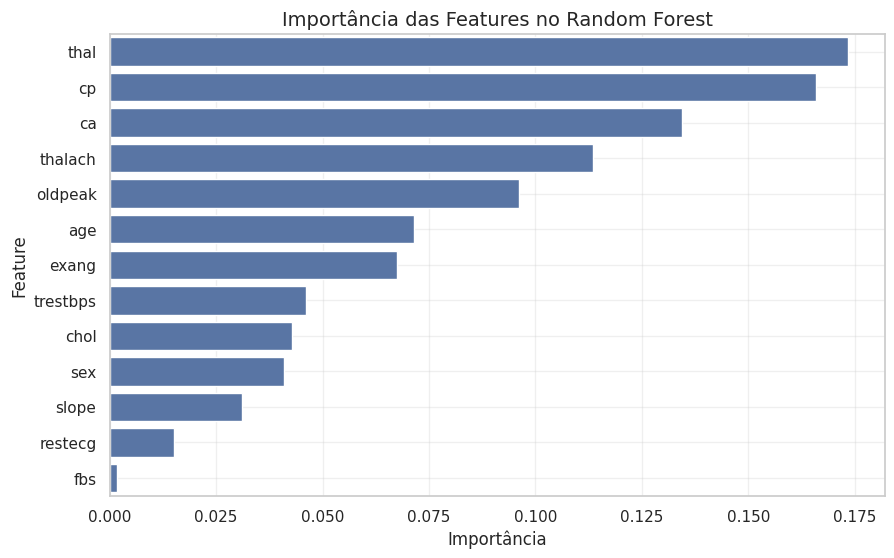


Importância das Features:
     Feature  Importância
12      thal     0.173376
2         cp     0.165998
11        ca     0.134336
7    thalach     0.113450
9    oldpeak     0.096057
0        age     0.071397
8      exang     0.067465
3   trestbps     0.045984
4       chol     0.042851
1        sex     0.041007
10     slope     0.031090
6    restecg     0.015209
5        fbs     0.001778


In [ ]:
# Identificando o melhor modelo após a otimização
melhor_modelo_nome = metricas_otimizados_df.iloc[0]['Modelo']
melhor_modelo = modelos_otimizados[melhor_modelo_nome]

print(f"O melhor modelo após a otimização é: {melhor_modelo_nome}")
print(f"Acurácia no conjunto de teste: {metricas_otimizados_df.iloc[0]['Acurácia']:.4f}")
print(f"ROC AUC no conjunto de teste: {metricas_otimizados_df.iloc[0]['ROC AUC']:.4f}")

# Analisando a importância das features (para modelos que suportam)
if hasattr(melhor_modelo, 'feature_importances_'):
    importancias = pd.DataFrame({
        'Feature': X.columns,
        'Importância': melhor_modelo.feature_importances_
    }).sort_values('Importância', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importância', y='Feature', data=importancias)
    plt.title(f'Importância das Features no {melhor_modelo_nome}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\nImportância das Features:")
    print(importancias)
elif hasattr(melhor_modelo, 'coef_'):
    coefs = pd.DataFrame({
        'Feature': X.columns,
        'Coeficiente': melhor_modelo.coef_[0]
    }).sort_values('Coeficiente', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coeficiente', y='Feature', data=coefs)
    plt.title(f'Coeficientes no {melhor_modelo_nome}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\nCoeficientes do modelo:")
    print(coefs)


#### fontes:


*   https://www.linkedin.com/posts/07sushant_heart-disease-prediction-in-this-video-activity-7264669149161824256-26ph/
*   https://www.projectpro.io/article/heart-disease-prediction-using-machine-learning-project/615
*   https://www.dataquest.io/blog/predicting-heart-disease-with-machine-learning/
*   https://github.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning
*   https://pmc.ncbi.nlm.nih.gov/articles/PMC11929227/
*   https://www.mdpi.com/2076-3417/11/18/8352



